In [5]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets


# Load the MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = datasets.mnist.load_data()

# Normalize pixel values between 0 and 1
X_train_full, X_test = X_train_full / 255.0, X_test / 255.0

X_train, X_temp, y_train, y_temp = train_test_split(X_train_full, y_train_full, test_size=0.4, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [9]:
X_train_full.shape[0]

60000

In [10]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax') 
])

# Print the model summary
model.summary()

c:\Users\Asus X513\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Compile the model
learning_rate = 0.00005

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=1024, validation_data=(X_val, y_val),verbose=2)

Epoch 1/20
36/36 - 9s - 253ms/step - accuracy: 0.1911 - loss: 2.2521 - val_accuracy: 0.5353 - val_loss: 2.1714
Epoch 2/20
36/36 - 7s - 203ms/step - accuracy: 0.4344 - loss: 2.0877 - val_accuracy: 0.6844 - val_loss: 1.9548
Epoch 3/20
36/36 - 7s - 195ms/step - accuracy: 0.5781 - loss: 1.8284 - val_accuracy: 0.7670 - val_loss: 1.6188
Epoch 4/20
36/36 - 7s - 192ms/step - accuracy: 0.6485 - loss: 1.4974 - val_accuracy: 0.8024 - val_loss: 1.2333
Epoch 5/20
36/36 - 8s - 219ms/step - accuracy: 0.7050 - loss: 1.1830 - val_accuracy: 0.8337 - val_loss: 0.9238
Epoch 6/20
36/36 - 8s - 222ms/step - accuracy: 0.7462 - loss: 0.9531 - val_accuracy: 0.8585 - val_loss: 0.7236
Epoch 7/20
36/36 - 9s - 261ms/step - accuracy: 0.7822 - loss: 0.7938 - val_accuracy: 0.8742 - val_loss: 0.5959
Epoch 8/20
36/36 - 8s - 223ms/step - accuracy: 0.8076 - loss: 0.6879 - val_accuracy: 0.8887 - val_loss: 0.5062
Epoch 9/20
36/36 - 8s - 231ms/step - accuracy: 0.8282 - loss: 0.6036 - val_accuracy: 0.8988 - val_loss: 0.4417
E

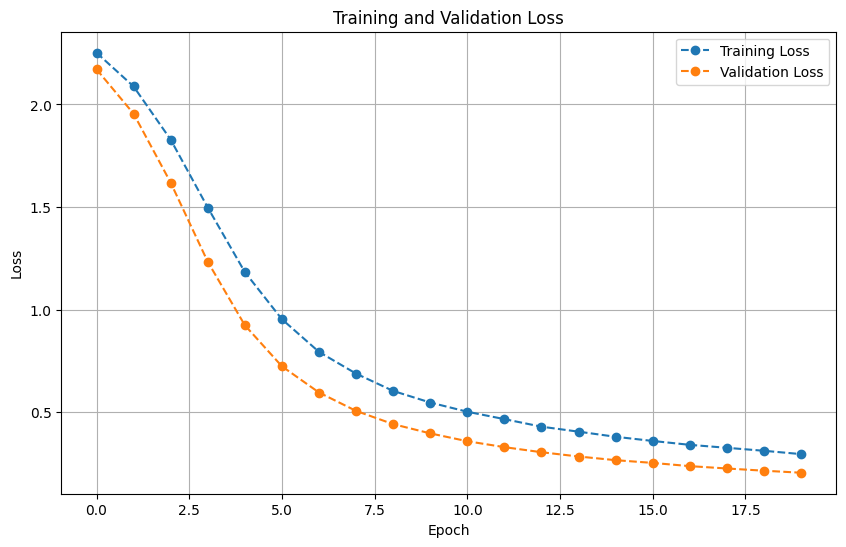

In [12]:
# Plot training, validation, and testing loss with respect to epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [23]:

from sklearn.metrics import classification_report

import numpy as np

# Get predictions from the model
y_pred = model.predict(X_test)  # X_test is your test data

# Assuming y_pred is the predicted probabilities, convert them to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the classification report
print(classification_report(y_test, y_pred_classes, digits=2))





375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1173
           1       0.96      0.98      0.97      1299
           2       0.91      0.93      0.92      1160
           3       0.94      0.92      0.93      1276
           4       0.95      0.94      0.95      1158
           5       0.95      0.94      0.95      1103
           6       0.97      0.97      0.97      1246
           7       0.93      0.93      0.93      1255
           8       0.92      0.92      0.92      1141
           9       0.92      0.92      0.92      1189

    accuracy                           0.94     12000
   macro avg       0.94      0.94      0.94     12000
weighted avg       0.94      0.94      0.94     12000



In [24]:
number = y_test[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


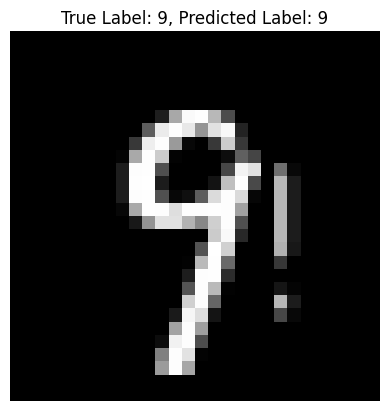

In [31]:
index = 30  # You can change this to test different images
single_image = X_test[index]

# Reshape the image to fit the input shape of the CNN model (batch size of 1, height, width, channels)
single_image_reshaped = single_image.reshape(1, 28, 28, 1)

# Predict the class of the single image
prediction = model.predict(single_image_reshaped)

# Convert the predicted probabilities to a class label
predicted_class = np.argmax(prediction, axis=1)

# Get the true class label
true_class = y_test[index]

# Display the image along with the predicted and true class
plt.imshow(single_image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {true_class}, Predicted Label: {predicted_class[0]}")
plt.axis('off')
plt.show()

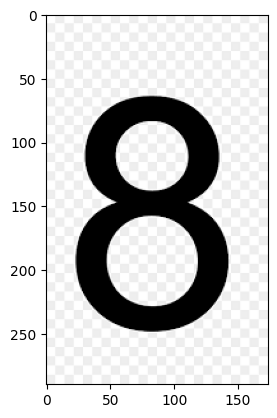

In [16]:
image = cv2.imread("C:/Users/Asus X513/Downloads/downloader.png")

plt.imshow(image)
plt.show()


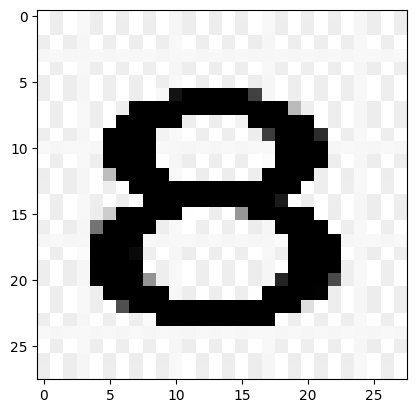

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
[[7.4537024e-03 4.1547301e-03 7.9984754e-01 1.3338736e-01 5.2475086e-03
  4.1345241e-03 2.7017087e-02 7.5343827e-04 1.7987981e-02 1.6107262e-05]]
Predicted class: 2


In [17]:
# Resize and scale the image
resized_image = tf.image.resize(image, (28, 28))
scaled_image = resized_image / 255

# Convert the RGB image to grayscale
grayscale_image = cv2.cvtColor(np.array(scaled_image), cv2.COLOR_RGB2GRAY)

# Display the grayscale image
plt.imshow(grayscale_image, cmap='gray')
plt.show()

# Reshape the grayscale image to match the model's expected input shape (1, 28, 28, 1)
grayscale_image = np.expand_dims(grayscale_image, axis=-1)  # (28, 28, 1)
grayscale_image = np.expand_dims(grayscale_image, axis=0)  # Add batch dimension (1, 28, 28, 1)

# Make predictions
y = model.predict(grayscale_image)
print(y)
predicted_class = np.argmax(y, axis=1)[0]

print(f"Predicted class: {predicted_class}")